In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
%matplotlib inline

In [2]:
#reading the dataset
df=pd.read_csv('car_price_prediction.csv')

In [3]:
#head
df.head()
#as we can see there in unamed column which can be dropped

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
#dropping the unnamed:0 column
df.drop('Unnamed: 0',axis=1,inplace=True)

In [8]:
#As there are many Nan values,dropping the New_Price column
df.drop('New_Price',axis=1,inplace=True)

In [9]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [10]:
#price is in float64 dtype, splitting the column and converting the Lakhs and crores to number literals
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


#now we have columns that needs a cleanup. Firstly,we need to tweak Kms_driven and Car_price_in_rupee columns by replacing
the units(kms,lakhs) with number literals


In [12]:
#dropping na values
df.dropna(axis=0,inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5975 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5975 non-null   object 
 1   Location           5975 non-null   object 
 2   Year               5975 non-null   int64  
 3   Kilometers_Driven  5975 non-null   int64  
 4   Fuel_Type          5975 non-null   object 
 5   Transmission       5975 non-null   object 
 6   Owner_Type         5975 non-null   object 
 7   Mileage            5975 non-null   object 
 8   Engine             5975 non-null   object 
 9   Power              5975 non-null   object 
 10  Seats              5975 non-null   float64
 11  Price              5975 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 606.8+ KB


In [15]:
#Coverting Milege to float Dtype by spliting the string
df['Mileage']=df['Mileage'].str.split().str.get(0)

In [17]:
df['Mileage']=df['Mileage'].astype(float)

In [19]:
#Coverting Engine to Int Dtype by spliting the string
df['Engine']=df['Engine'].str.split().str.get(0)
df['Engine']=df['Engine'].astype(int)


In [23]:
#Coverting Power to float Dtype by spliting the string
df['Power']=df['Power'].str.split().str.get(0)

In [28]:
df=df[df['Power']!='null']

In [29]:
df['Power']=df['Power'].astype(float)

C:\Users\naren\AppData\Local\Temp\ipykernel_30996\1008304494.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Power']=df['Power'].astype(float)


In [30]:
df.rename(columns={'Mileage':'Mileage_kmpl','Engine':'Engine_cc','Power':'Power_bhp'},inplace=True)

C:\Users\naren\AppData\Local\Temp\ipykernel_30996\1016781931.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Mileage':'Mileage_kmpl','Engine':'Engine_cc','Power':'Power_bhp'},inplace=True)


In [35]:
from datetime import date
df['Cars_age']=date.today().year-df['Year']

C:\Users\naren\AppData\Local\Temp\ipykernel_30996\2842210239.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cars_age']=date.today().year-df['Year']


In [37]:
df.drop('Year',axis=1,inplace=True)

C:\Users\naren\AppData\Local\Temp\ipykernel_30996\3001728433.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Year',axis=1,inplace=True)


In [43]:
df['Brand']=df['Name'].str.split().str.get(0)

C:\Users\naren\AppData\Local\Temp\ipykernel_30996\2148366874.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Brand']=df['Name'].str.split().str.get(0)


In [44]:
df.head()

,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_kmpl,Engine_cc,Power_bhp,Seats,Price,Cars_age,Brand
0,Maruti Wagon R LXI CNG,Mumbai,72000,CNG,Manual,First,26.60,998,58.16,5.00,1.75,13,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,41000,Diesel,Manual,First,19.67,1582,126.20,5.00,12.50,8,Hyundai
2,Honda Jazz V,Chennai,46000,Petrol,Manual,First,18.20,1199,88.70,5.00,4.50,12,Honda
3,Maruti Ertiga VDI,Chennai,87000,Diesel,Manual,First,20.77,1248,88.76,7.00,6.00,11,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,40670,Diesel,Automatic,Second,15.20,1968,140.80,5.00,17.74,10,Audi


In [45]:
df.drop('Name',axis=1,inplace=True)


C:\Users\naren\AppData\Local\Temp\ipykernel_30996\1836467280.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Name',axis=1,inplace=True)


In [47]:
df=df.iloc[:,[0,11,1,2,3,4,5,6,7,8,9,10]]
df.head()

,Brand,Cars_age,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_kmpl,Engine_cc,Power_bhp,Seats,Price
0,Maruti,13,Mumbai,72000,CNG,Manual,First,26.60,998,58.16,5.00,1.75
1,Hyundai,8,Pune,41000,Diesel,Manual,First,19.67,1582,126.20,5.00,12.50
2,Honda,12,Chennai,46000,Petrol,Manual,First,18.20,1199,88.70,5.00,4.50
3,Maruti,11,Chennai,87000,Diesel,Manual,First,20.77,1248,88.76,7.00,6.00
4,Audi,10,Coimbatore,40670,Diesel,Automatic,Second,15.20,1968,140.80,5.00,17.74


In [48]:
pd.set_option('display.float_format', '{:.2f}'.format)
df.describe()

,Cars_age,Kilometers_Driven,Mileage_kmpl,Engine_cc,Power_bhp,Seats,Price
count,5872.00,5872.00,5872.00,5872.00,5872.00,5872.00,5872.00
mean,9.52,58317.00,18.28,1625.75,113.28,5.28,9.60
std,3.16,92169.41,4.37,601.64,53.88,0.81,11.25
min,4.00,171.00,0.00,624.00,34.20,2.00,0.44
25%,7.00,33422.50,15.26,1198.00,75.00,5.00,3.52
50%,9.00,52609.00,18.20,1495.50,97.70,5.00,5.75
75%,11.00,72402.75,21.10,1991.00,138.10,5.00,10.00
max,25.00,6500000.00,33.54,5998.00,560.00,10.00,160.00


In [ ]:
#some of the columns seems skewed and has outliers

### Uni-Variate Analysis

Text(0.5, 1.0, 'Histplot for Price in Lakhs')

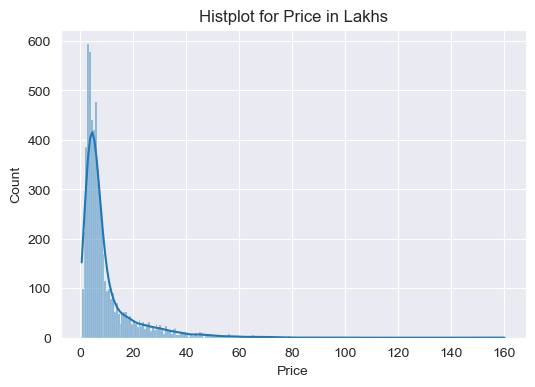

In [53]:
sns.set_style('darkgrid')
fig,ax=plt.subplots(figsize=(6,4))
sns.histplot(df,x='Price',ax=ax,kde=True).set_title('Histplot for Price in Lakhs')
#from this we can see the car_price is right skewed and also contains outliers

Text(0.5, 1.0, 'Distribution of KMs-Driven')

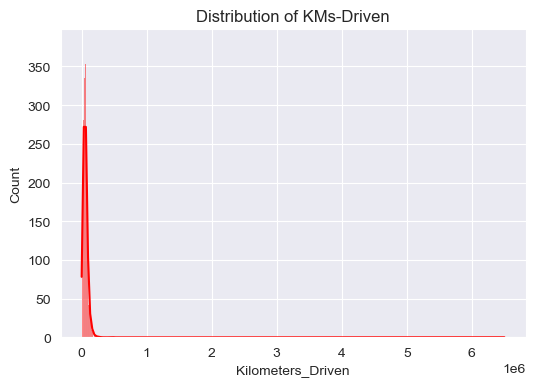

In [52]:
pd.set_option('display.float_format', '{:.2f}'.format)
sns.set_style('darkgrid')
fig,ax=plt.subplots(figsize=(6,4))
sns.histplot(df,x='Kilometers_Driven',ax=ax,kde=True,color='r').set_title('Distribution of KMs-Driven')
#right skewed

Text(0.5, 1.0, 'Distribution of Mileage_kmpl')

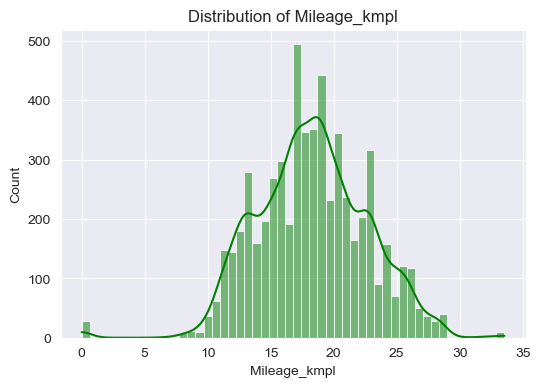

In [57]:

sns.set_style('darkgrid')
fig,ax=plt.subplots(figsize=(6,4))
sns.histplot(df,x='Mileage_kmpl',ax=ax,kde=True,color='g').set_title('Distribution of Mileage_kmpl')
#slightly left skewed.

In [56]:
df.head(0)

,Brand,Cars_age,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_kmpl,Engine_cc,Power_bhp,Seats,Price


Text(0.5, 1.0, 'Distribution of Engine_cc')

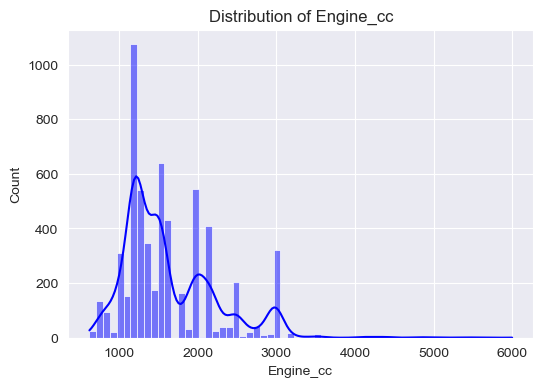

In [58]:
sns.set_style('darkgrid')
fig,ax=plt.subplots(figsize=(6,4))
sns.histplot(df,x='Engine_cc',ax=ax,kde=True,color='b').set_title('Distribution of Engine_cc')
#right skeweness for Engine cc column

<Axes: ylabel='Seats'>

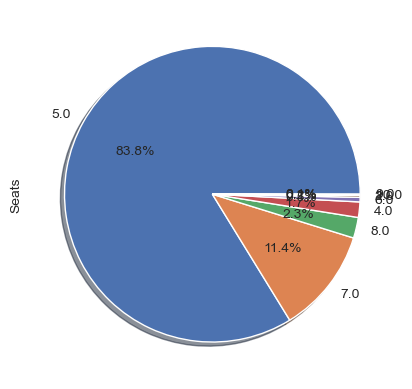

In [69]:
df['Seats'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('deep'),shadow=True)
#most of the cars are 5 seat cars

<Axes: xlabel='Fuel_Type', ylabel='count'>

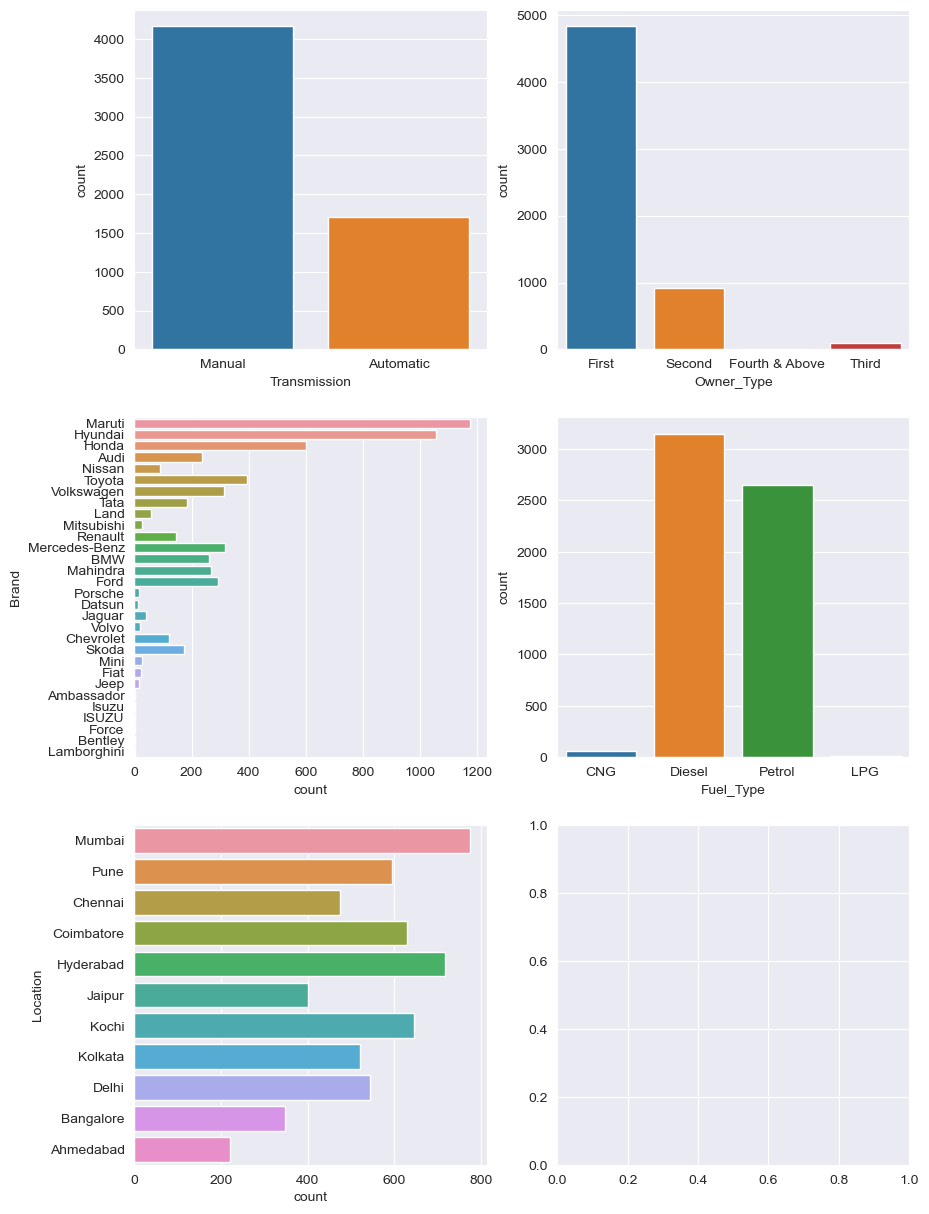

In [66]:
fig,ax=plt.subplots(3,2,figsize=(10,15))
sns.countplot(df,x='Transmission',ax=ax[0,0])
sns.countplot(df,x='Owner_Type',ax=ax[0,1])
sns.countplot(df,y='Brand',ax=ax[1,0])
sns.countplot(df,y='Location',ax=ax[2,0])
sns.countplot(df,x='Fuel_Type',ax=ax[1,1])

1) people are using More diesel cars than Petrol in this dataset.
2) Maruti brand cars are significantly higher.
3) majority of the cars are owned by first owner and they use Manual transmission.

### Bi-variate Analysis

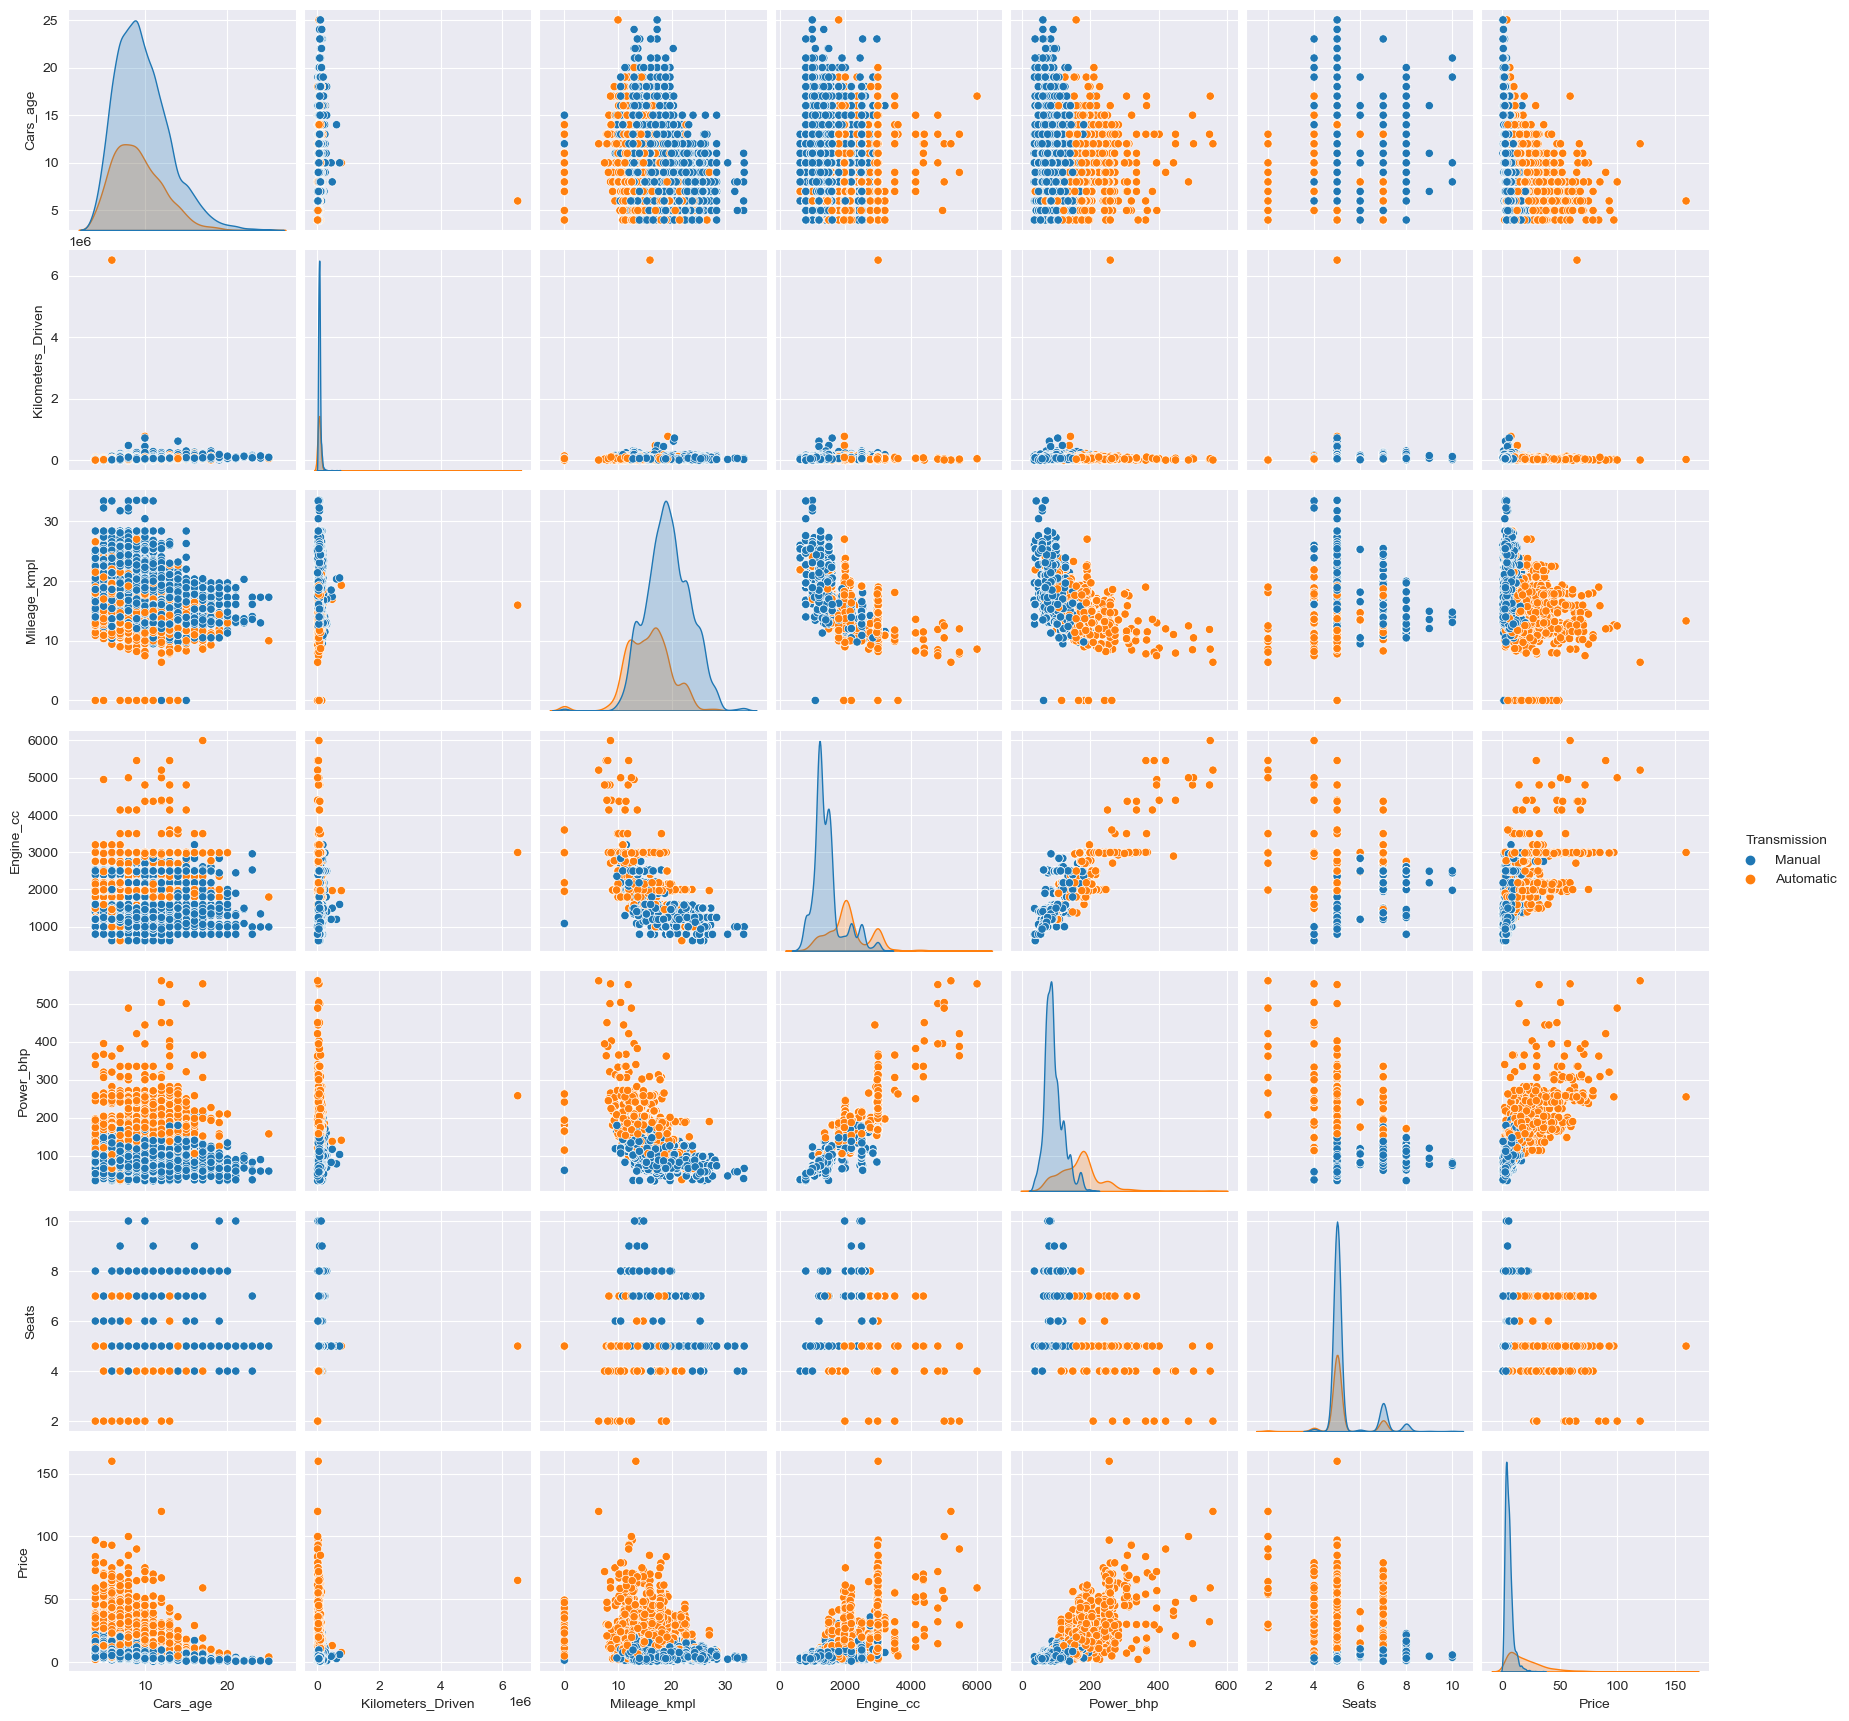

In [68]:
sns.pairplot(df,hue='Transmission')

1) there is clear relation between cars_age and price.Increase in age means decrease in price
2) Price coloumn has positive correlation with Engine_cc,Power_bhp.


C:\Users\naren\AppData\Local\Temp\ipykernel_30996\2862082878.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap='viridis',annot=True)


<Axes: >

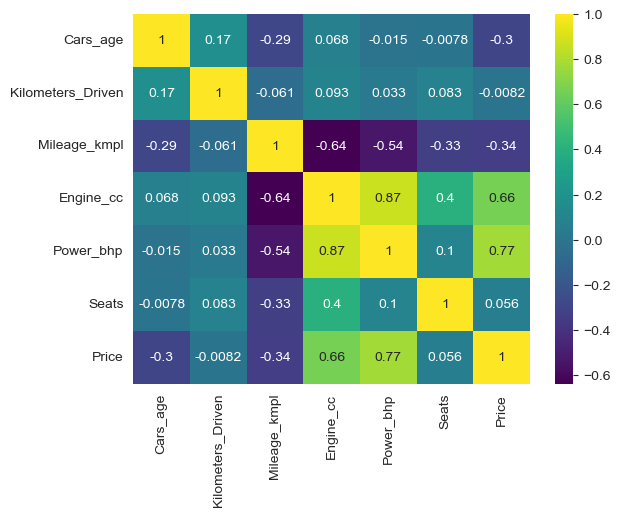

In [71]:
#to understand the how strong the correlation 
sns.heatmap(df.corr(),cmap='viridis',annot=True)

In [72]:
df.head()

,Brand,Cars_age,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_kmpl,Engine_cc,Power_bhp,Seats,Price
0,Maruti,13,Mumbai,72000,CNG,Manual,First,26.60,998,58.16,5.00,1.75
1,Hyundai,8,Pune,41000,Diesel,Manual,First,19.67,1582,126.20,5.00,12.50
2,Honda,12,Chennai,46000,Petrol,Manual,First,18.20,1199,88.70,5.00,4.50
3,Maruti,11,Chennai,87000,Diesel,Manual,First,20.77,1248,88.76,7.00,6.00
4,Audi,10,Coimbatore,40670,Diesel,Automatic,Second,15.20,1968,140.80,5.00,17.74


<Axes: xlabel='Price', ylabel='Brand'>

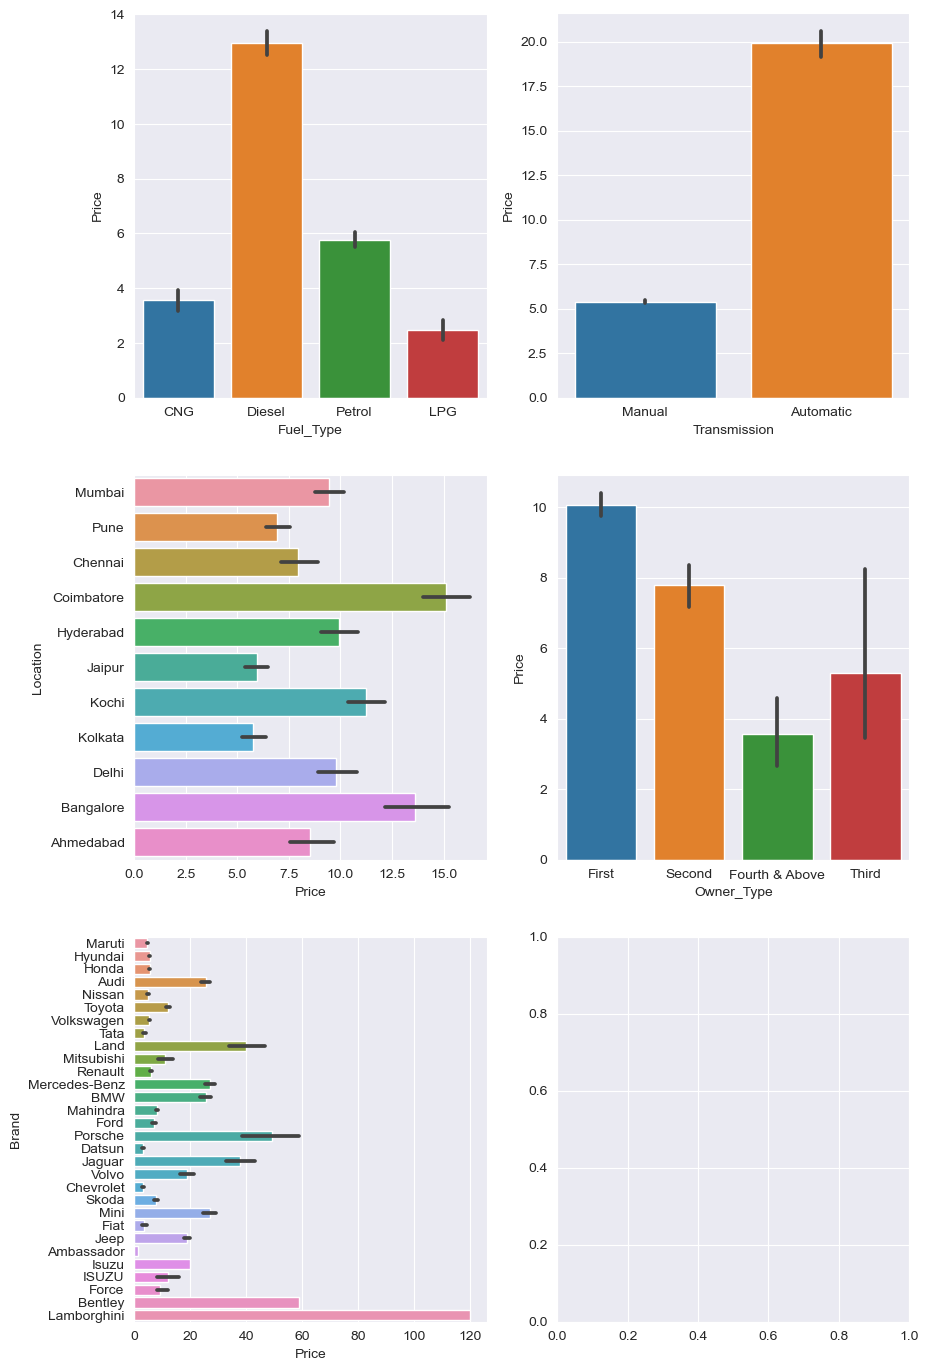

In [75]:
fig,ax=plt.subplots(3,2,figsize=(10,17))
sns.barplot(df,x='Fuel_Type',y='Price',ax=ax[0,0])
sns.barplot(df,x='Transmission',y='Price',ax=ax[0,1])
sns.barplot(df,x='Owner_Type',y='Price',ax=ax[1,1])
sns.barplot(df,y='Location',x='Price',ax=ax[1,0])
sns.barplot(df,y='Brand',x='Price',ax=ax[2,0])
#sns.barplot(df,y='y',y='Price',ax=ax[2,1])
#sns.barplot(df,y='z',y='Price',ax=ax[3,0])

1) Lamborgini is getting the Highest Price. Due to its Premium quality.
2) as obvious in nature, first owner is getting the highest Price quote.
3) in Coimbatore there is higher sale of used cars.
4) Dieasel cars are getting more Price.
5) Automatic cast are usually costlier than Manual ones

In [76]:
df.head()

,Brand,Cars_age,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_kmpl,Engine_cc,Power_bhp,Seats,Price
0,Maruti,13,Mumbai,72000,CNG,Manual,First,26.60,998,58.16,5.00,1.75
1,Hyundai,8,Pune,41000,Diesel,Manual,First,19.67,1582,126.20,5.00,12.50
2,Honda,12,Chennai,46000,Petrol,Manual,First,18.20,1199,88.70,5.00,4.50
3,Maruti,11,Chennai,87000,Diesel,Manual,First,20.77,1248,88.76,7.00,6.00
4,Audi,10,Coimbatore,40670,Diesel,Automatic,Second,15.20,1968,140.80,5.00,17.74


### outliers

<Axes: ylabel='Seats'>

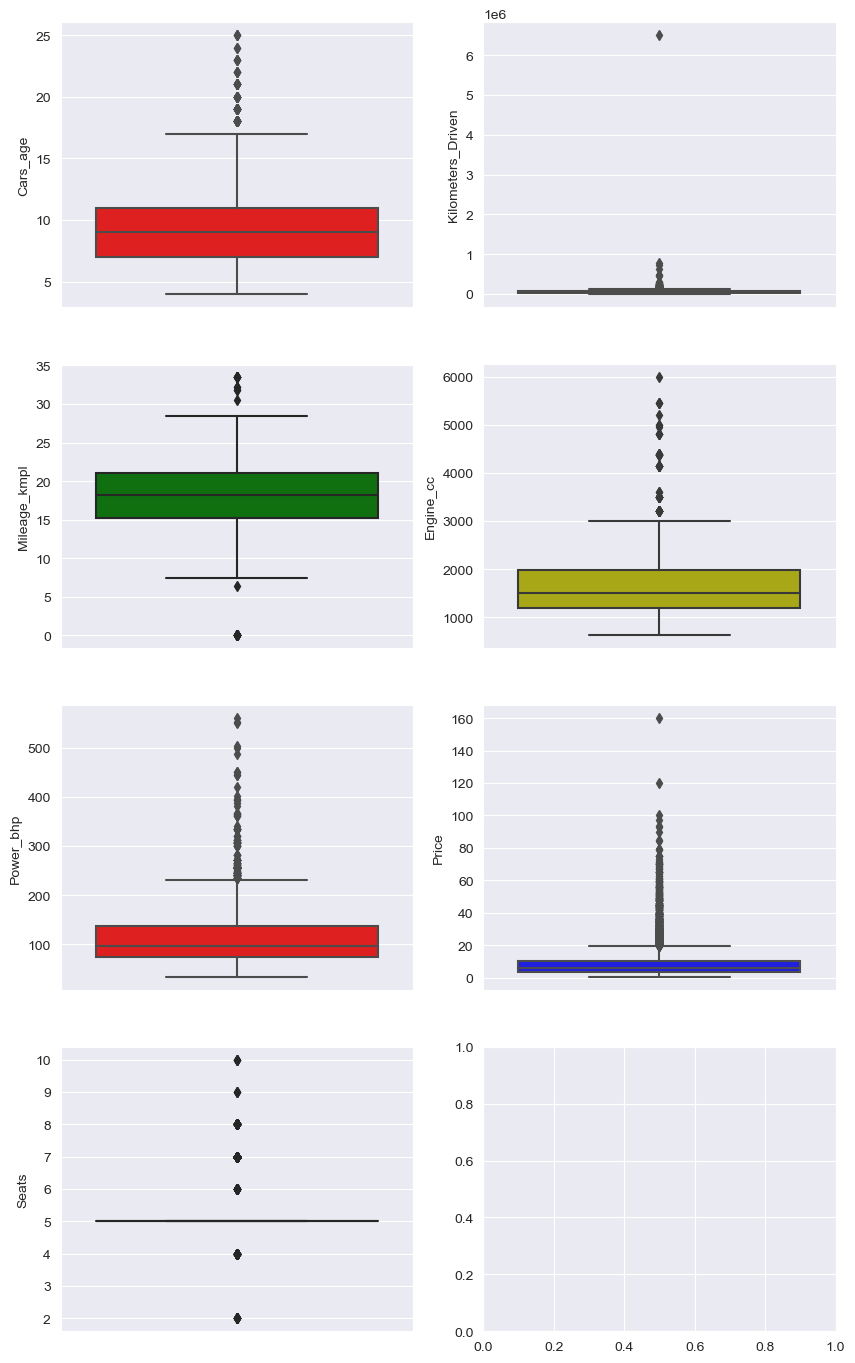

In [77]:
fig,ax=plt.subplots(4,2,figsize=(10,17))
sns.boxplot(df,y='Cars_age',ax=ax[0,0],color='r')
sns.boxplot(df,y='Kilometers_Driven',ax=ax[0,1],color='b')
sns.boxplot(df,y='Mileage_kmpl',ax=ax[1,0],color='g')
sns.boxplot(df,y='Engine_cc',ax=ax[1,1],color='y')
sns.boxplot(df,y='Power_bhp',ax=ax[2,0],color='r')
sns.boxplot(df,y='Price',ax=ax[2,1],color='b')
sns.boxplot(df,y='Seats',ax=ax[3,0],color='g')

In [92]:
df_num=df.select_dtypes('number')
df_num.drop('Seats',axis=1,inplace=True)

In [93]:
Q1=df_num.quantile(0.25)
Q3=df_num.quantile(0.75)
IQR=Q3-Q1
upper_bound=Q3+1.5*IQR
lower_bound=Q1-1.5*IQR

In [94]:
lower_bound

Cars_age                 1.00
Kilometers_Driven   -21178.25
Mileage_kmpl             8.32
Engine_cc              606.00
Power_bhp                8.00
Price                   -2.88
dtype: float64

In [95]:
df=df[((df_num>lower_bound) & (df_num<upper_bound)).all(axis='columns')]

<Axes: ylabel='Price'>

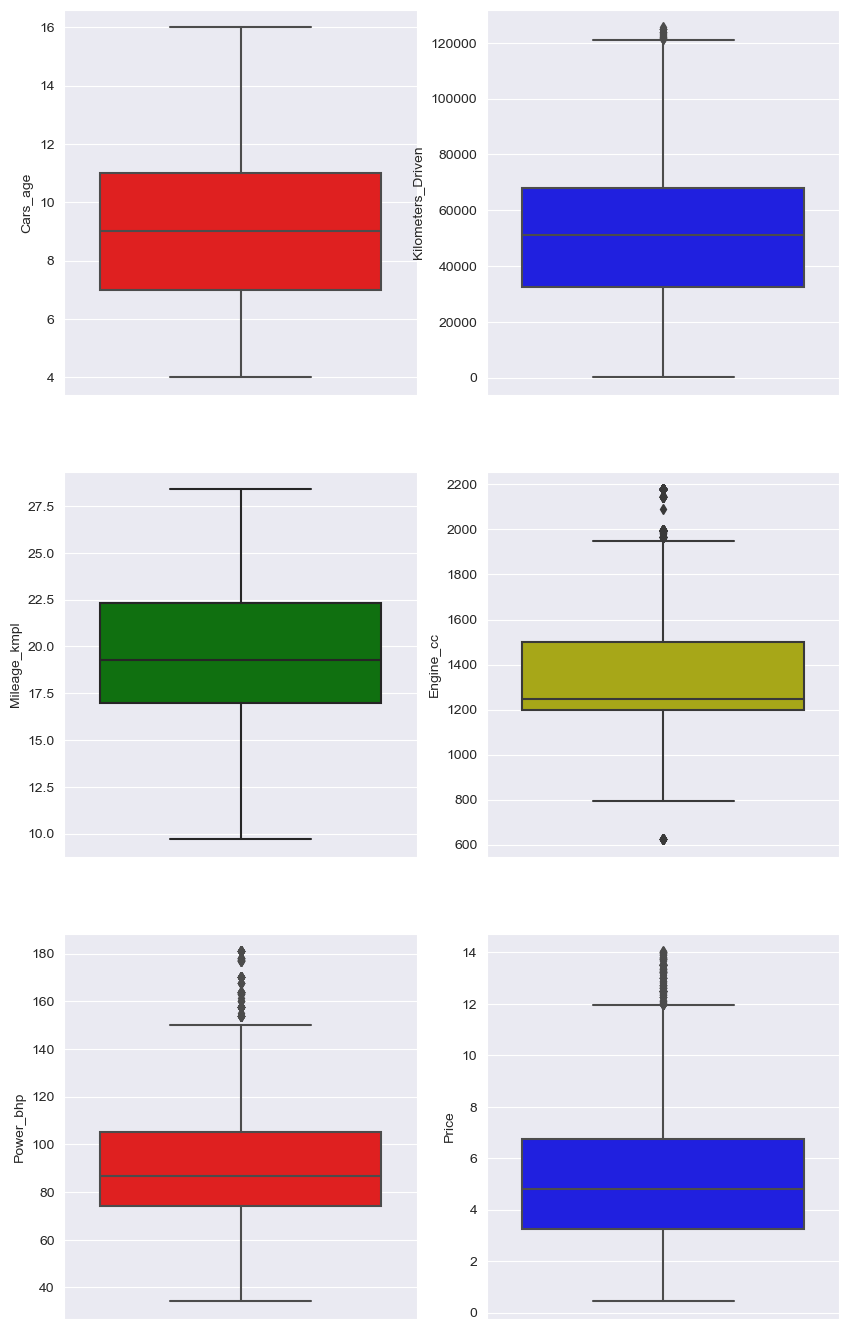

In [96]:
fig,ax=plt.subplots(3,2,figsize=(10,17))
sns.boxplot(df,y='Cars_age',ax=ax[0,0],color='r')
sns.boxplot(df,y='Kilometers_Driven',ax=ax[0,1],color='b')
sns.boxplot(df,y='Mileage_kmpl',ax=ax[1,0],color='g')
sns.boxplot(df,y='Engine_cc',ax=ax[1,1],color='y')
sns.boxplot(df,y='Power_bhp',ax=ax[2,0],color='r')
sns.boxplot(df,y='Price',ax=ax[2,1],color='b')


In [97]:
df.shape

(4145, 12)

### Train Test Split

In [99]:
X=df.drop('Price',axis=1)
y=df['Price']

In [101]:
X_num=X.select_dtypes('number')
X_cat=X.select_dtypes('object')
X_cat_encoded=pd.get_dummies(X_cat,dtype=int)


In [102]:
X_cat_encoded.shape,X_num.shape

((4145, 41), (4145, 6))

In [103]:
X=pd.concat([X_num,X_cat_encoded],axis=1)

In [104]:
X.shape

(4145, 47)

In [105]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,train_size=0.70)

### Hold out Method

In [106]:
Mape_train=[]
Mape_test=[]
for k in list(range(1,30,2)):
    model=KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train,y_train)
    y_train_pred=model.predict(X_train)
    train_MAPE=mean_absolute_percentage_error(y_train,y_train_pred)
    Mape_train.append(train_MAPE)
    y_test_pred=model.predict(X_test)
    test_MAPE=mean_absolute_percentage_error(y_test,y_test_pred)
    Mape_test.append(test_MAPE)

<Axes: >

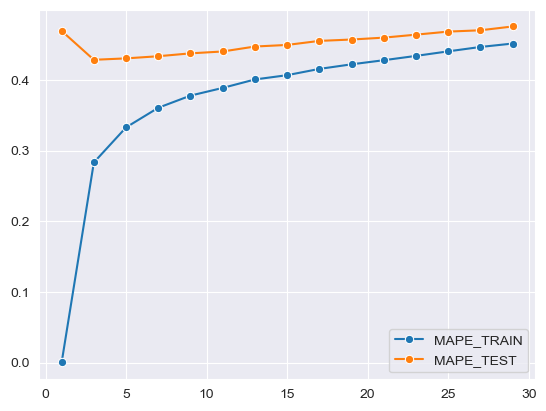

In [107]:
sns.set_style('darkgrid')
sns.lineplot(y=Mape_train,x=list(range(1,30,2)),label='MAPE_TRAIN',marker='o')
sns.lineplot(y=Mape_test,x=list(range(1,30,2)),label='MAPE_TEST',marker='o')
#with this plot we can observe the minimum distance between Test and Train Mapes are at K=5

### CV Score Method

In [108]:
k_values = np.arange(1, 30, 2)
cv_mape_scores = []
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    # Calculate CV MAPE using cross-validation (CV) with full X and y
    cv_scores = -cross_val_score(knn, X, y, cv=5, scoring='neg_mean_absolute_percentage_error')
    cv_mape = np.mean(cv_scores)
    cv_mape_scores.append(cv_mape)

<Axes: >

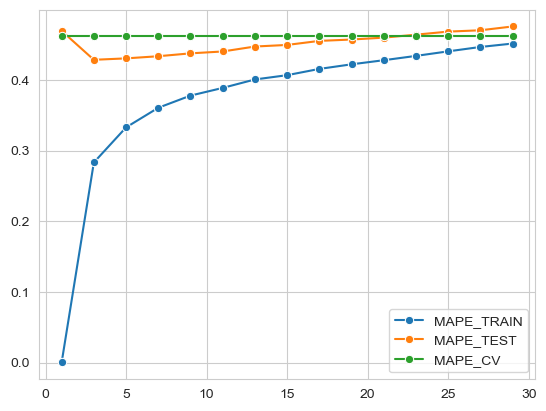

In [109]:
sns.set_style('whitegrid')
sns.lineplot(y=Mape_train,x=list(range(1,30,2)),label='MAPE_TRAIN',marker='o')
sns.lineplot(y=Mape_test,x=list(range(1,30,2)),label='MAPE_TEST',marker='o')
sns.lineplot(y=cv_mape,x=list(range(1,30,2)),label='MAPE_CV',marker='o')
#with this CV plot we can observe the minimum distance between Test, Train and CV Mapes are at K=5

### CV Score using Function

In [110]:
def cv(X,y):
    #mape_train_lst=[]
    mape_test_lst=[]
    CV_mape_lst=[]
    for k in list(range(1,30,2)):
        #print('entered 1st for')
        for j in list(range(1,3)):
            #print('entered second for')
            X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.70,test_size=0.3)
            #print(X_train.shape,y_train.shape)
            model=KNeighborsRegressor(n_neighbors=k)
            model.fit(X_train,y_train)
            #y_train_pred=model.predict(X_train)
            #Mape_train=mean_absolute_percentage_error(y_train,y_train_pred)
            #mape_train_lst.append(Mape_train)
            y_test_pred=model.predict(X_test)
            #print(y_test_pred.shape)
            Mape_test=mean_absolute_percentage_error(y_test,y_test_pred)
            mape_test_lst.append(Mape_test)
            #print(Mape_test)
        CV_mape_lst.append(np.mean(mape_test_lst))
    print(CV_mape_lst)
    return CV_mape_lst

    
CV_scores=cv(X,y)

[0.4634215964293862, 0.4427170588556002, 0.4404785466560874, 0.43556133435478184, 0.43564876436042904, 0.43911313947797104, 0.4400503111062332, 0.4407915418262579, 0.44097889523132655, 0.44270211881734933, 0.4422273696034708, 0.4450989949952368, 0.4465421532636347, 0.44841564171603565, 0.4506397892733273]


<Axes: >

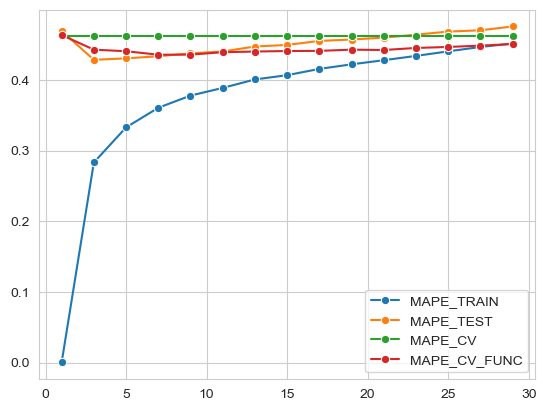

In [111]:
sns.set_style('whitegrid')
sns.lineplot(y=  ,x=list(range(1,30,2)),label='MAPE_TRAIN',marker='o')
sns.lineplot(y=Mape_test,x=list(range(1,30,2)),label='MAPE_TEST',marker='o')
sns.lineplot(y=cv_mape,x=list(range(1,30,2)),label='MAPE_CV',marker='o')
sns.lineplot(y=CV_scores,x=list(range(1,30,2)),label='MAPE_CV_FUNC',marker='o')
#with this CV function plot we can observe the minimum distance between Test, Train and CV Mapes are at K=5